In [ ]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [ ]:
train_labels =  []
train_samples = []

In [ ]:
#FROM AGES 13-64 => NO SIDE EFFECT IN 95% IN THE DATA SET
#FROM AGES 64-100 => SIDE EFFECT UPTO 95% OF THE DATA SET
for i in range(50):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [ ]:
#print raw data
for i in train_samples:
    print(i)

50
95
27
75
20
72
42
76
33
81
31
84
58
65
16
91
19
93
16
75
61
85
33
65
17
84
41
94
40
98
24
79
57
98
48
74
26
85
53
93
28
96
35
82
26
72
46
80
25
85
55
72
47
85
21
90
18
66
48
95
33
93
28
69
50
82
53
86
46
75
40
68
56
75
16
70
55
90
20
68
56
70
13
66
15
83
16
89
32
88
19
65
14
72
48
87
45
75
58
83
36
83
55
85
45
80
35
91
13
96
30
80
16
69
35
91
19
72
16
100
41
67
48
73
53
68
13
98
19
92
21
70
23
91
18
68
47
92
62
73
27
86
47
85
48
65
54
85
25
93
30
69
47
93
47
70
40
75
62
83
36
77
64
94
29
97
43
84
37
65
52
81
14
74
62
76
58
99
17
89
40
100
55
97
16
71
19
70
26
86
41
93
46
93
26
97
62
100
39
85
26
85
53
74
53
96
23
75
25
83
42
79
62
88
58
94
17
80
61
72
21
77
49
67
59
93
21
97
29
66
63
91
44
72
60
90
47
66
49
70
15
74
51
73
41
89
43
97
14
68
45
79
60
80
38
94
56
99
28
92
30
100
22
91
33
90
62
73
47
72
30
91
52
72
64
98
27
90
45
86
47
88
42
74
53
71
26
73
14
96
53
74
13
67
44
67
43
71
52
99
50
88
64
86
31
83
48
78
33
91
30
93
49
77
22
85
46
71
41
84
48
69
37
79
56
66
35
70
36
78
45
91


In [ ]:
for i in train_labels:
    print(i)

1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [ ]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

In [ ]:
#print scaled data
for i in scaled_train_samples:
    print(i)

[0.42528736]
[0.94252874]
[0.16091954]
[0.71264368]
[0.08045977]
[0.67816092]
[0.33333333]
[0.72413793]
[0.22988506]
[0.7816092]
[0.20689655]
[0.81609195]
[0.51724138]
[0.59770115]
[0.03448276]
[0.89655172]
[0.06896552]
[0.91954023]
[0.03448276]
[0.71264368]
[0.55172414]
[0.82758621]
[0.22988506]
[0.59770115]
[0.04597701]
[0.81609195]
[0.32183908]
[0.93103448]
[0.31034483]
[0.97701149]
[0.12643678]
[0.75862069]
[0.50574713]
[0.97701149]
[0.40229885]
[0.70114943]
[0.14942529]
[0.82758621]
[0.45977011]
[0.91954023]
[0.17241379]
[0.95402299]
[0.25287356]
[0.79310345]
[0.14942529]
[0.67816092]
[0.37931034]
[0.77011494]
[0.13793103]
[0.82758621]
[0.48275862]
[0.67816092]
[0.3908046]
[0.82758621]
[0.09195402]
[0.88505747]
[0.05747126]
[0.6091954]
[0.40229885]
[0.94252874]
[0.22988506]
[0.91954023]
[0.17241379]
[0.64367816]
[0.42528736]
[0.79310345]
[0.45977011]
[0.83908046]
[0.37931034]
[0.71264368]
[0.31034483]
[0.63218391]
[0.49425287]
[0.71264368]
[0.03448276]
[0.65517241]
[0.48275862]
[0

In [ ]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(scaled_train_samples, train_labels, validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
189/189 - 1s - loss: 0.6573 - accuracy: 0.5593 - val_loss: 0.6403 - val_accuracy: 0.5810
Epoch 2/20
189/189 - 0s - loss: 0.6292 - accuracy: 0.6444 - val_loss: 0.6098 - val_accuracy: 0.6714
Epoch 3/20
189/189 - 0s - loss: 0.6028 - accuracy: 0.6921 - val_loss: 0.5812 - val_accuracy: 0.7095
Epoch 4/20
189/189 - 0s - loss: 0.5769 - accuracy: 0.7228 - val_loss: 0.5521 - val_accuracy: 0.7476
Epoch 5/20
189/189 - 0s - loss: 0.5500 - accuracy: 0.7725 - val_loss: 0.5198 - val_accuracy: 0.7714
Epoch 6/20
189/189 - 0s - loss: 0.5213 - accuracy: 0.8000 - val_loss: 0.4880 - val_accuracy: 0.8095
Epoch 7/20
189/189 - 0s - loss: 0.4945 - accuracy: 0.8228 - val_loss: 0.4576 - val_accuracy: 0.8429
Epoch 8/20
189/189 - 0s - loss: 0.4693 - accuracy: 0.8360 - val_loss: 0.4286 - val_accuracy: 0.8476
Epoch 9/20
189/189 - 0s - loss: 0.4457 - accuracy: 0.8466 - val_loss: 0.4011 - val_accuracy: 0.8762
Epoch 10/20
189/189 - 0s - loss: 0.4238 - accuracy: 0.8667 - val_loss: 0.3752 - val_accuracy: 0.8952

In [ ]:
test_labels =  []
test_samples = []

In [ ]:
for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [ ]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

In [ ]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0)

In [ ]:
for i in predictions:
    print(i)

[0.53204274 0.46795732]
[0.10071717 0.8992828 ]
[0.897649   0.10235096]
[0.07131472 0.9286853 ]
[0.90815353 0.09184647]
[0.30209705 0.697903  ]
[0.90882194 0.09117809]
[0.05635975 0.94364023]
[0.897649   0.10235096]
[0.34429863 0.6557014 ]
[0.9126304  0.08736966]
[0.1951734 0.8048266]
[0.9128983  0.08710174]
[0.16660602 0.833394  ]
[0.8838301  0.11616992]
[0.24470861 0.75529134]
[0.7836662  0.21633384]
[0.14148505 0.85851496]
[0.9015824  0.09841758]
[0.06564446 0.93435556]
[0.9112583 0.0887417]
[0.34429863 0.6557014 ]
[0.9037041  0.09629595]
[0.3664149 0.6335851]
[0.507944   0.49205595]
[0.06564446 0.93435556]
[0.90815353 0.09184647]
[0.16660602 0.833394  ]
[0.91085696 0.0891431 ]
[0.16660602 0.833394  ]
[0.9047478  0.09525226]
[0.03394848 0.9660515 ]
[0.9078183 0.0921817]
[0.2107899 0.7892101]
[0.90179735 0.09820269]
[0.3664149 0.6335851]
[0.53204274 0.46795732]
[0.28213426 0.71786577]
[0.90882194 0.09117809]
[0.227303 0.772697]
[0.8146173  0.18538271]
[0.08454212 0.9154579 ]
[0.81461

In [ ]:
rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
for i in rounded_predictions:
    print(i)

0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[190  20]
 [ 10 200]]


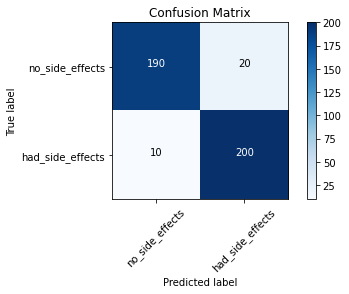

In [ ]:

cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')